<a href="https://colab.research.google.com/github/yeesem/Time-Series-Data-Analysis/blob/main/Prophet_Stocks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install prophet

In [2]:
!wget -nc https://lazyprogrammer.me/course_files/sp500sub.csv

--2023-11-30 14:24:45--  https://lazyprogrammer.me/course_files/sp500sub.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 172.67.213.166, 104.21.23.210, 2606:4700:3030::ac43:d5a6, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|172.67.213.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25473876 (24M) [text/csv]
Saving to: ‘sp500sub.csv’

sp500sub.csv        100%[===================>]  24.29M  38.2MB/s    in 0.6s    

2023-11-30 14:24:47 (38.2 MB/s) - ‘sp500sub.csv’ saved [25473876/25473876]



In [3]:
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("sp500sub.csv",index_col = 'Date',parse_dates = True)

In [5]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Name
Date,,,,,,,
2010-01-04,9.22,9.51,9.17,9.50,9.50,1865400.0,INCY
2010-01-05,9.51,10.29,9.45,10.27,10.27,7608900.0,INCY
2010-01-06,10.38,11.09,10.35,11.00,11.00,8046700.0,INCY
2010-01-07,11.00,11.06,10.62,10.82,10.82,3680300.0,INCY
2010-01-08,10.82,11.00,10.75,10.94,10.94,1529300.0,INCY


In [6]:
goog = df[df['Name'] == 'GOOG'][['Close']].copy()

In [7]:
goog.head()

,Close
Date,
2010-01-04,312.204773
2010-01-05,310.829926
2010-01-06,302.994293
2010-01-07,295.940735
2010-01-08,299.885956


In [16]:
goog.columns = ['y']
goog['ds'] = goog.index

In [19]:
goog.head()

,y,ds
Date,,
2010-01-04,312.204773,2010-01-04
2010-01-05,310.829926,2010-01-05
2010-01-06,302.994293,2010-01-06
2010-01-07,295.940735,2010-01-07
2010-01-08,299.885956,2010-01-08


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc6j86m6w/o5dazwgf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc6j86m6w/45lnjhaw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92952', 'data', 'file=/tmp/tmpc6j86m6w/o5dazwgf.json', 'init=/tmp/tmpc6j86m6w/45lnjhaw.json', 'output', 'file=/tmp/tmpc6j86m6w/prophet_modelyk3ctpdv/prophet_model-20231130144731.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:47:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:47:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


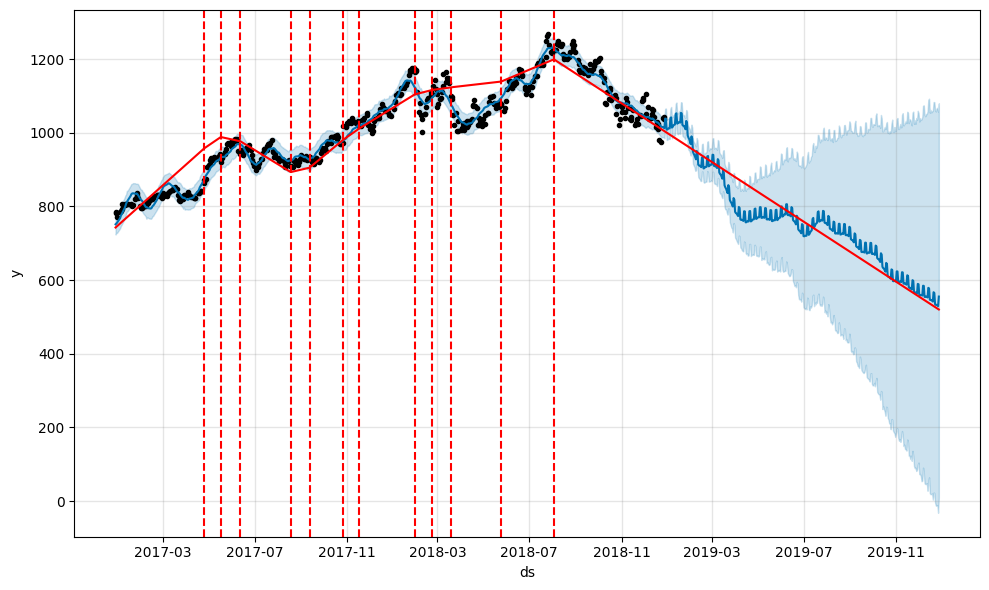

In [20]:
m = Prophet()
m.fit(goog.iloc[-252*2:])
future = m.make_future_dataframe(periods = 365)
forecast = m.predict(future)
fig = m.plot(forecast);
a = add_changepoints_to_plot(fig.gca(),m,forecast)

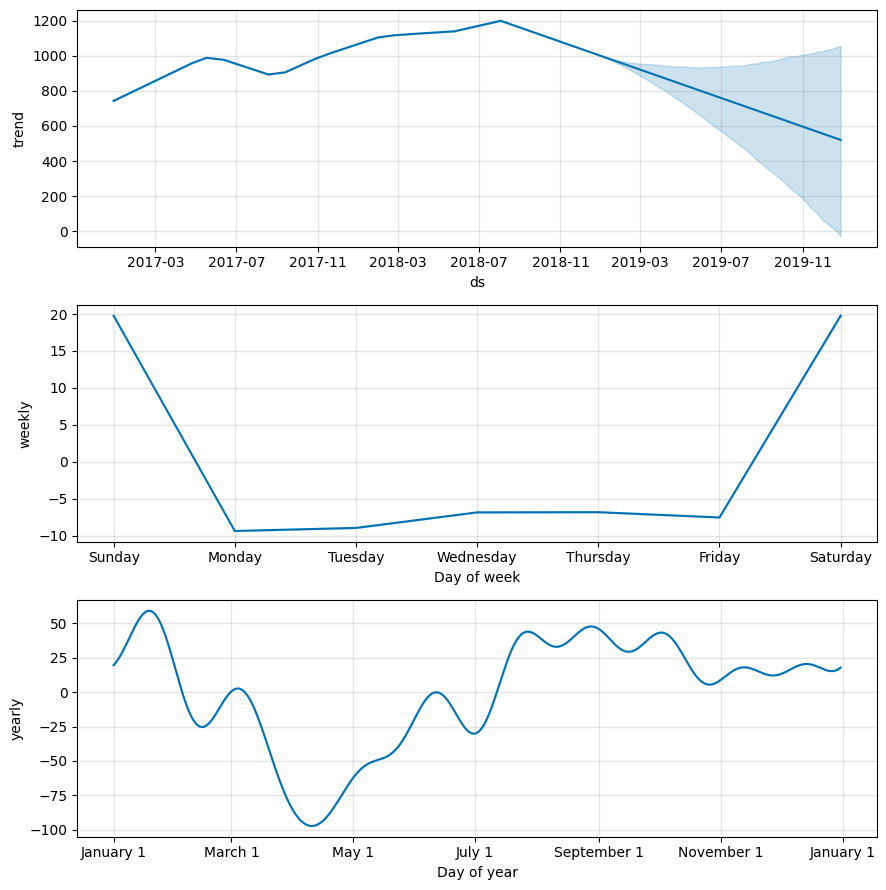

In [21]:
m.plot_components(forecast);

DEBUG:cmdstanpy:input tempfile: /tmp/tmpc6j86m6w/kn1w6x5l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc6j86m6w/tgnk348k.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68333', 'data', 'file=/tmp/tmpc6j86m6w/kn1w6x5l.json', 'init=/tmp/tmpc6j86m6w/tgnk348k.json', 'output', 'file=/tmp/tmpc6j86m6w/prophet_model_fm1a8tf/prophet_model-20231130145756.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:57:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:57:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


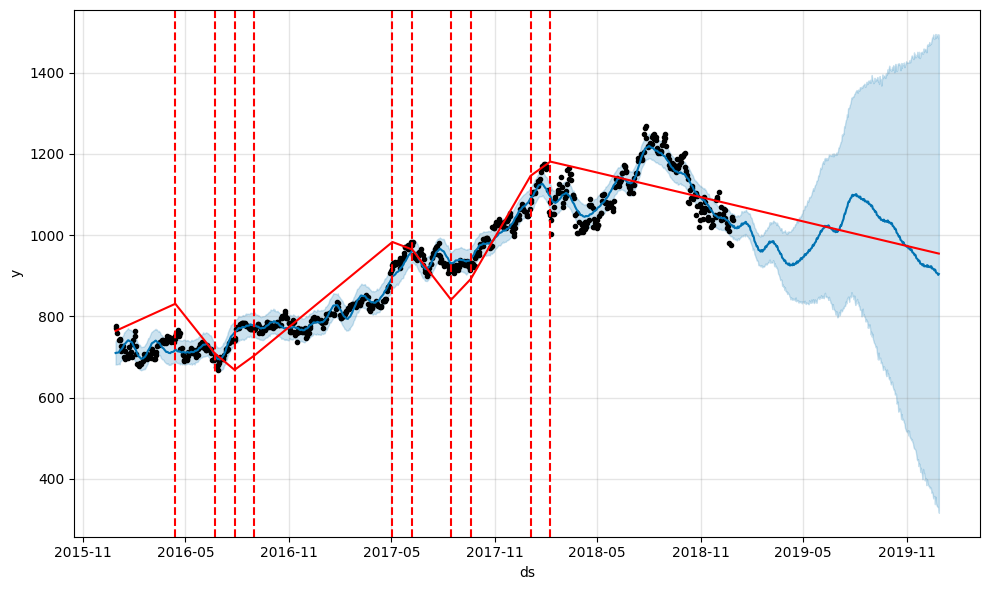

In [26]:
#Bad!!! From blog article
m = Prophet(daily_seasonality = True)
m.fit(goog.iloc[-252*3:])
future = m.make_future_dataframe(periods = 365)
forecast = m.predict(future)
fig = m.plot(forecast);
a = add_changepoints_to_plot(fig.gca(),m,forecast)

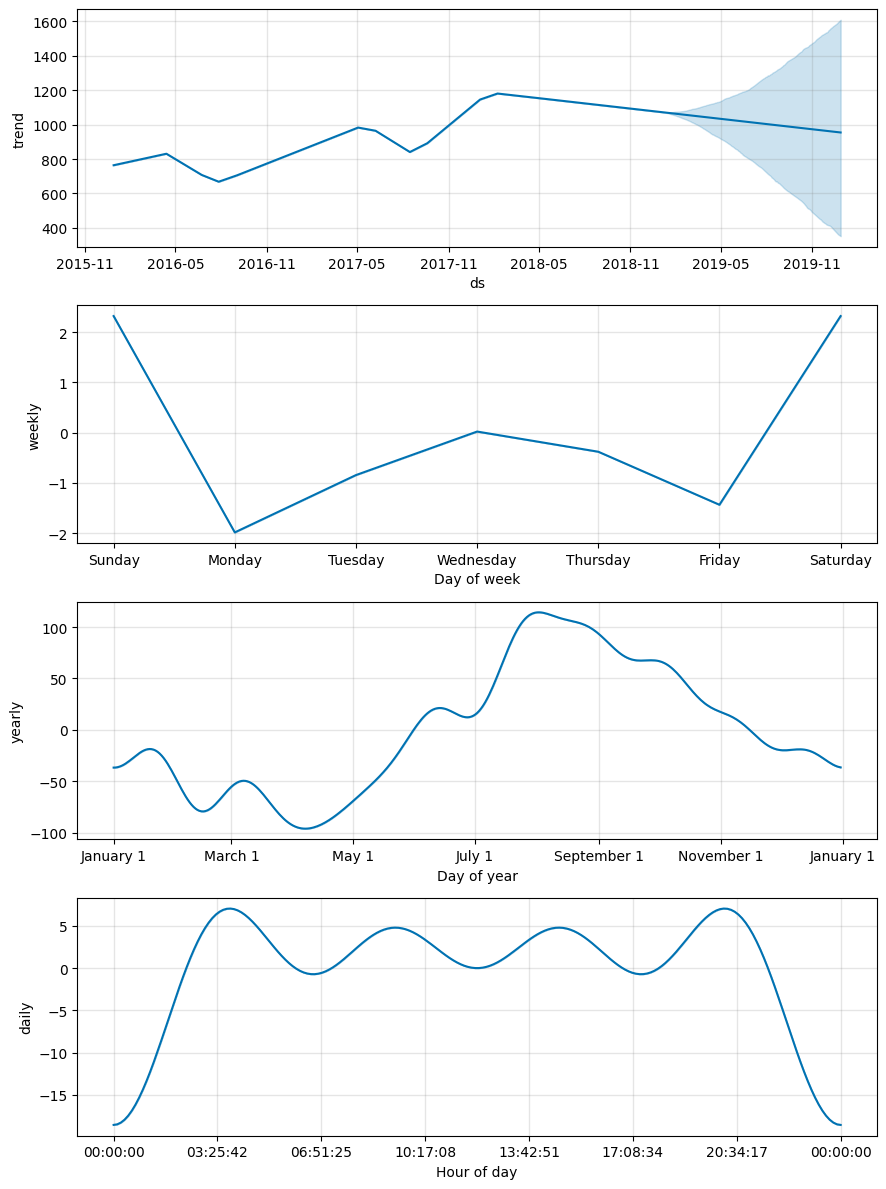

In [23]:
m.plot_components(forecast);

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc6j86m6w/z4b1oa2z.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc6j86m6w/0efeg67r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98960', 'data', 'file=/tmp/tmpc6j86m6w/z4b1oa2z.json', 'init=/tmp/tmpc6j86m6w/0efeg67r.json', 'output', 'file=/tmp/tmpc6j86m6w/prophet_modelg3nwuzpu/prophet_model-20231130145659.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:56:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:56:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


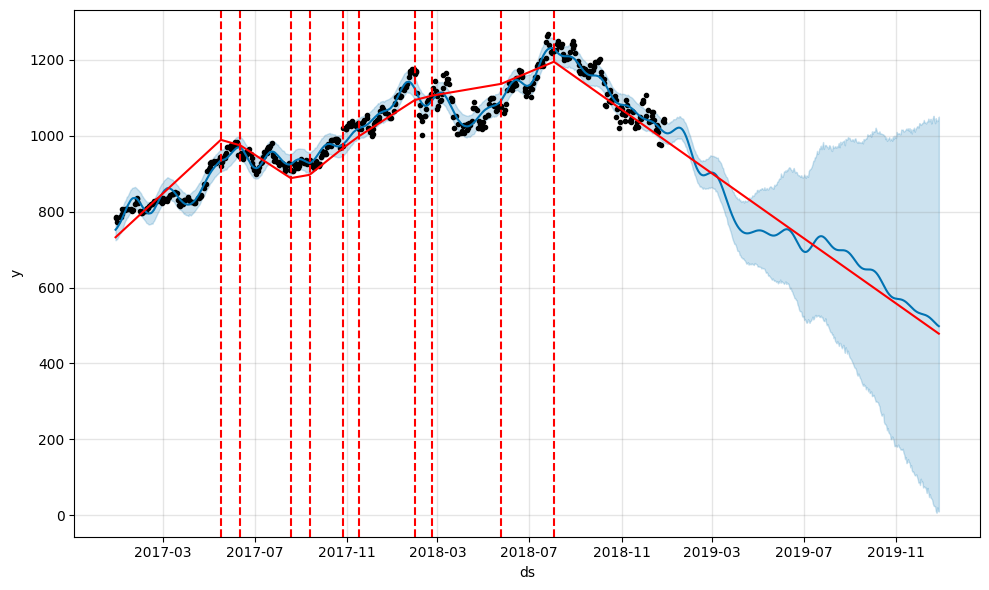

In [24]:
m = Prophet(weekly_seasonality=False)
m.fit(goog.iloc[-252*2:])
future = m.make_future_dataframe(periods = 365)
forecast = m.predict(future)
fig = m.plot(forecast);
a = add_changepoints_to_plot(fig.gca(),m,forecast)

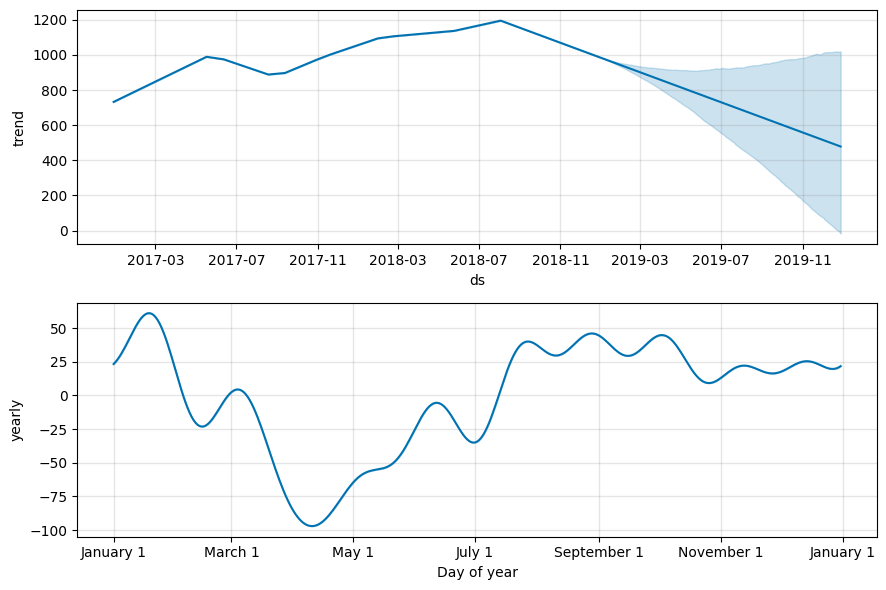

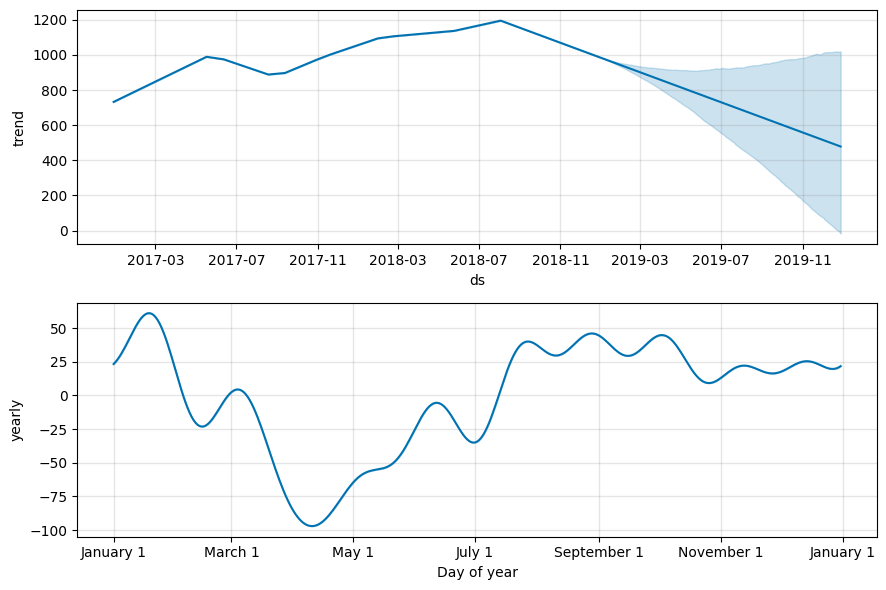

In [25]:
m.plot_components(forecast)

# **Cross Validation**

In [30]:
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
from prophet.plot import plot_cross_validation_metric

In [31]:
m = Prophet(weekly_seasonality = False)

In [32]:
m.fit(goog[-252*2:])

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc6j86m6w/tb4cduln.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc6j86m6w/_cj_j8g5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13639', 'data', 'file=/tmp/tmpc6j86m6w/tb4cduln.json', 'init=/tmp/tmpc6j86m6w/_cj_j8g5.json', 'output', 'file=/tmp/tmpc6j86m6w/prophet_model6p8xv8oy/prophet_model-20231130150216.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:02:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:02:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [33]:
#try period = 15,horizon = 30
#try period = 30,horizon = 60
df_cv = cross_validation(
    m,
    initial = '365 days',
    period = '5 days',
    horizon = '5 days'
)

INFO:prophet:Making 73 forecasts with cutoffs between 2017-12-28 00:00:00 and 2018-12-23 00:00:00


  0%|          | 0/73 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpc6j86m6w/c0ix3baa.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc6j86m6w/e9eevt74.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43757', 'data', 'file=/tmp/tmpc6j86m6w/c0ix3baa.json', 'init=/tmp/tmpc6j86m6w/e9eevt74.json', 'output', 'file=/tmp/tmpc6j86m6w/prophet_model3asabehc/prophet_model-20231130150348.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:03:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:03:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc6j86m6w/75nd68ai.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc6j86m6w/leqdg0h9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

In [34]:
df_cv.head(20)

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2017-12-29,1065.658142,1051.783380,1078.694582,1046.400024,2017-12-28
1,2018-01-02,1069.639101,1055.762703,1083.853204,1065.000000,2017-12-28
2,2018-01-03,1065.833370,1052.031201,1079.240730,1082.479980,2018-01-02
3,2018-01-04,1066.915631,1052.825460,1081.577654,1086.400024,2018-01-02
4,2018-01-05,1068.098353,1053.618541,1082.243513,1102.229980,2018-01-02
5,2018-01-08,1086.246895,1071.635968,1099.797066,1106.939941,2018-01-07
6,2018-01-09,1088.059922,1074.487019,1102.488076,1106.260010,2018-01-07
7,2018-01-10,1089.843189,1075.243029,1103.615309,1102.609985,2018-01-07
8,2018-01-11,1091.577186,1077.922554,1105.455689,1105.520020,2018-01-07
9,2018-01-12,1093.241843,1078.460552,1106.676629,1122.260010,2018-01-07


In [35]:
df_cv.shape

(251, 6)

In [37]:
naive = df_cv[['ds','yhat','y','cutoff']].copy()

In [38]:
naive.head()

,ds,yhat,y,cutoff
0,2017-12-29,1065.658142,1046.400024,2017-12-28
1,2018-01-02,1069.639101,1065.000000,2017-12-28
2,2018-01-03,1065.833370,1082.479980,2018-01-02
3,2018-01-04,1066.915631,1086.400024,2018-01-02
4,2018-01-05,1068.098353,1102.229980,2018-01-02


In [41]:
naive_storage = np.zeros(naive.shape[0])
naive_storage

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [42]:
one_day = pd.Timedelta(1,'day')
for i,row in naive.iterrows():
  cutoff = row['cutoff']

  #must find last cutoff that actually exist in df
  while cutoff not in goog.index:
    cutoff = cutoff - one_day

  naive_storage[i] = goog.loc[cutoff]['y']

naive['yhat'] = naive_storage

In [43]:
pm = performance_metrics(df_cv)
pm['smape'].mean()

0.03134136992139367

In [44]:
#pm > naive
#Naive[benchmark] better
#pm higher that benchmark value
naive_metrics = performance_metrics(naive)
naive_metrics['smape'].mean()

0.020548255026446992

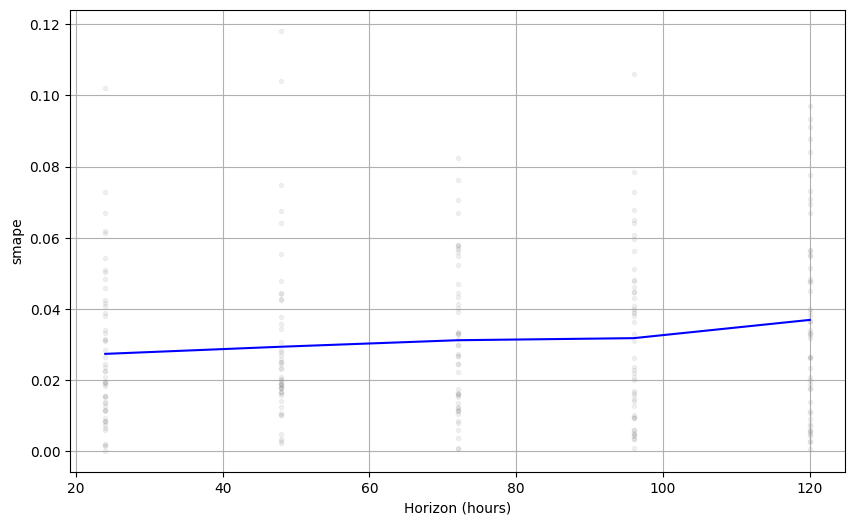

In [46]:
#Forecast error grow over time
plot_cross_validation_metric(df_cv,metric='smape');

# **Cross-validation with Logged Data**

In [47]:
log_goog = goog.copy()
log_goog['y'] = np.log(goog['y'])

In [49]:
m = Prophet(weekly_seasonality = False)
m.fit(log_goog[-252*2:])
df_cv = cross_validation(
    m,
    initial = '365 days',
    period = '30 days',
    horizon = '60 days'
)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc6j86m6w/qardjpcu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc6j86m6w/wi50yvpn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5085', 'data', 'file=/tmp/tmpc6j86m6w/qardjpcu.json', 'init=/tmp/tmpc6j86m6w/wi50yvpn.json', 'output', 'file=/tmp/tmpc6j86m6w/prophet_modelb8d73usj/prophet_model-20231130152056.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:20:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:20:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 11 forecasts with cutoffs between 2018-01-02 00:00:00 and 2018-10-29 00:00:00


  0%|          | 0/11 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpc6j86m6w/6rkzfv9p.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc6j86m6w/kzwez21a.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21956', 'data', 'file=/tmp/tmpc6j86m6w/6rkzfv9p.json', 'init=/tmp/tmpc6j86m6w/kzwez21a.json', 'output', 'file=/tmp/tmpc6j86m6w/prophet_modelfqfcfb7b/prophet_model-20231130152056.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:20:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:20:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc6j86m6w/pfgoq1p9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc6j86m6w/7nwrirl8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

In [50]:
pm = performance_metrics(df_cv)

In [51]:
pm['smape'].mean()

0.014651237735781229

In [54]:
naive = df_cv[['ds','yhat','y','cutoff']].copy()
naive_storage = np.zeros(naive.shape[0])

for i,row in naive.iterrows():
  cutoff = row['cutoff']

  #must find last cutoff that actually exists in df
  while cutoff not in goog.index:
    cutoff = cutoff - pd.Timedelta(1,'day')

  naive_storage[i] = log_goog.loc[cutoff]['y']

naive['yhat'] = naive_storage
naive_metrics = performance_metrics(naive)
naive_metrics['smape'].mean()

0.008361150811971313

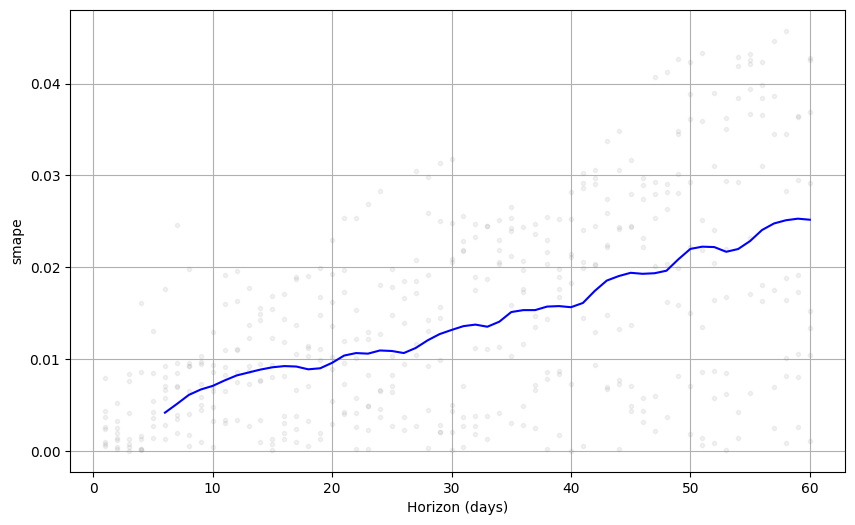

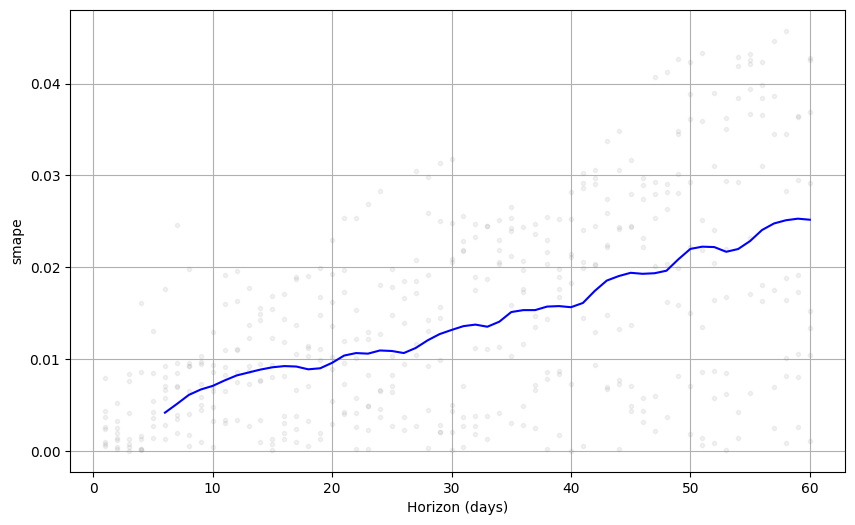

In [55]:
#Forecast error increasing
plot_cross_validation_metric(df_cv,metric = 'smape')